# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Wenkang Wei"
COLLABORATORS = "Wenkang Wei"

# CPSC4300/6300-001 Problem Set #2


# Part B: Analyzing Time Series  Data


## Introduction

The Python data science software stack have a wide range of applications in financial analysis, ranging from historical stock data analysis, correlation between search data with trends in stock prices, algorithmic trading, options modeling, portfolio risk analysis, and many others. In this notebook, you will build a dashboard for stock charting and analysis.

__Warnings:__ This intention of this notebook is to provide a hand-on exercise to develop data science skills. You shall not use the tools for actual stock trading, which involves very high risk of financial loss.

## Set up the environment

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

%matplotlib inline

pd.set_option('precision', 4)

## Get The data

There are numerous sources where you get financial data. One of the most popular sources is Yahoo Finance (https://finance.yahoo.com/). If you are interested in other data sources, you may check the list at the awesome-quant github repo (https://github.com/wilsonfreitas/awesome-quant#data-sources).

To fetch data from Yahoo Finance, you can use python modules like `pandas-datareader` (https://pandas-datareader.readthedocs.io/en/latest/index.html), `yfinance` (https://aroussi.com/post/python-yahoo-finance), or others.

## Question 1. Download the historical stock prices of the Apple stock. (5 points)

1. __Write some python code to download the historical stock prices of `Apple` (stock symbol: `AAPL`) from `January, 1, 2017` to `today`. Save the data into a variable named `stock`.__

I suggest that you use the `yfinance` module since it is more convenient to get the Yahoo! Finance data than `pandas-datareader`.

You need importing all the required libraries that haven't been imported in your code.

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
import yfinance as yf
stock = yf.download("AAPL", start="2017-01-01", end=str(datetime.date.today()))
stock.head(3)

#  Note:  Since I'm using today() function the AAPL data may change as date of testing this program changes,
#  the Figures in this project will look a little different from example figures


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.9500,29.0825,28.6900,29.0375,27.5484,115127600
2017-01-04,28.9625,29.1275,28.9375,29.0050,27.5176,84472400
2017-01-05,28.9800,29.2150,28.9525,29.1525,27.6575,88774400


In [4]:
# test the data is of correct shape
assert stock.shape[1] == 6

# test the index is of DatetimeIndex
assert isinstance (stock.index, pd.DatetimeIndex)

In [5]:
# test all required symbols are included 
cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
assert all([s in stock.columns for s in cols])

In [6]:
# test the date range in correct range
start, end, today = stock.index.min(), stock.index.max(), datetime.date.today()
assert start-pd.Timestamp(2017, 1,1) <= pd.Timedelta(days=4)
assert pd.Timestamp(today.year, today.month, today.day) - end  <= pd.Timedelta(days=4)

## Preprocess The Data

## Question 2. Calculate the simple returns using the adjusted closed price. (5 points)

Stock prices are usually non-stationary: their statistics, such as mean and variance change over time. By transforming the prices into returns, we attempt to make the time series stationary, which is a desired property in statistical modeling.

There are two types of returns: simple returns and log returns. Simple returns aggregate over assets. The simple return of a portfolio is the weighted sum of the returns of the individual assets in the portfolio. Simple returns are defined as:

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_{t}}{P_{t-1}} - 1 $$

1. __Save the `Adj Close` price of the `AAPL` into a temporary DataFrame named `df`. Compute the simply returns of the adjusted closed price and add it to the `df` DataFrame. Name the two columns in `df` as `adj_close` and `simple_return`.__ (5 points)

Hint: you can use the `pct_change` method of a DataFrame to compute the simple returns.

In [7]:
df = stock['Adj Close'].copy()
simple_return = df.pct_change().rename("simple_return")
pd.concat((df, simple_return),axis=1)

,Adj Close,simple_return
Date,,
2017-01-03,27.5484,NaN
2017-01-04,27.5176,-0.0011
2017-01-05,27.6575,0.0051
2017-01-06,27.9659,0.0111
2017-01-09,28.2220,0.0092
...,...,...
2020-09-30,115.8100,0.0151
2020-10-01,116.7900,0.0085
2020-10-02,113.0200,-0.0323


In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
df = stock['Adj Close'].copy()
df = df.rename('adj_close')
simple_return = df.pct_change().rename("simple_return")
df = pd.concat((df, simple_return),axis=1)

df.head()

,adj_close,simple_return
Date,,
2017-01-03,27.5484,NaN
2017-01-04,27.5176,-0.0011
2017-01-05,27.6575,0.0051
2017-01-06,27.9659,0.0111
2017-01-09,28.2220,0.0092


In [9]:
# test the dataframe has the required columns
assert all([c in df.columns for c in ['adj_close', 'simple_return']])

In [10]:
# verify that the first entry of the `simple_return` is of expected value 
assert np.isnan(df.simple_return[0])

In [11]:
# verify the correct relation between adj_close and simple_return
assert all(abs(df.adj_close[i] + df.adj_close[i] * df.simple_return[i+1] - df.adj_close[i+1]) <= 1e-4 \
           for i in range(2, len(df)-5))

## Visualize Time Series

## Question 3. Plot the historical stock prices and simply returns. (5 points)

Plot the stock prices and simple returns of the Apple stock. A sample figure may look like the figure below:
![Example Stock Price Chart](https://www.palmetto.clemson.edu/dsci/figures/ps02b_aapl.png)

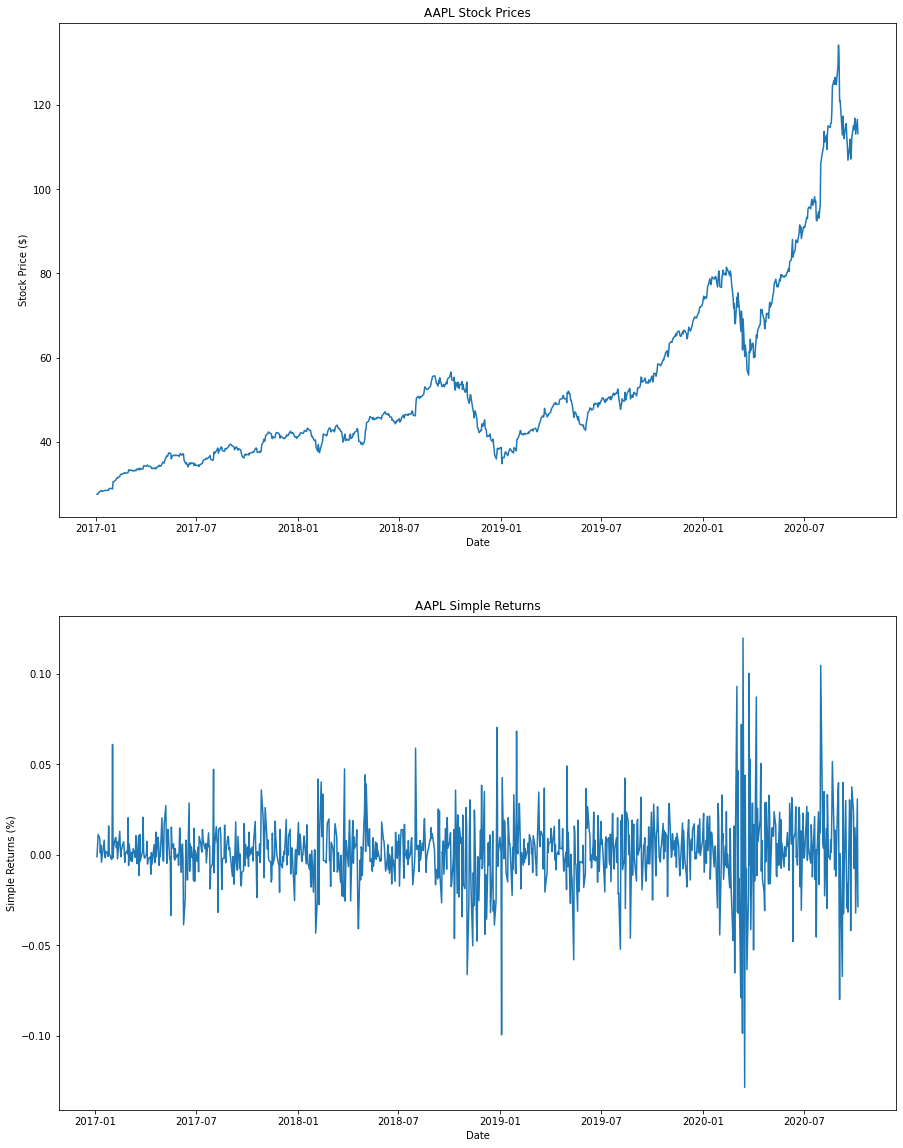

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()
figure, ax = plt.subplots(2, 1, figsize=(15,20))
ax[0].plot(df.index, df['adj_close'])
ax[0].set_title("AAPL Stock Prices")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Stock Price ($)")

ax[1].plot(df.index, df['simple_return'])
ax[1].set_title("AAPL Simple Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Simple Returns (%)")
plt.show()

### Plot with the mplfinance utilties

Like `seaborn`, people have developed plotting utilities on top of `pandas` and `matplotlib` to makes it easier to create domain-specific plots. For financial plots, a popular package is `mplfinance` (https://github.com/matplotlib/mplfinance).

## Question 4. Plot the apple stock prices in the past three months. (10 points)

Use the `mplfinance` to create a plot of the past 92 days of the apple stock prices, volumes, and 10-day moving average. Your figure may look like the following figure. 
![Example MPL Finance Figure](https://www.palmetto.clemson.edu/dsci/figures/ps02b_mplfinance.png)

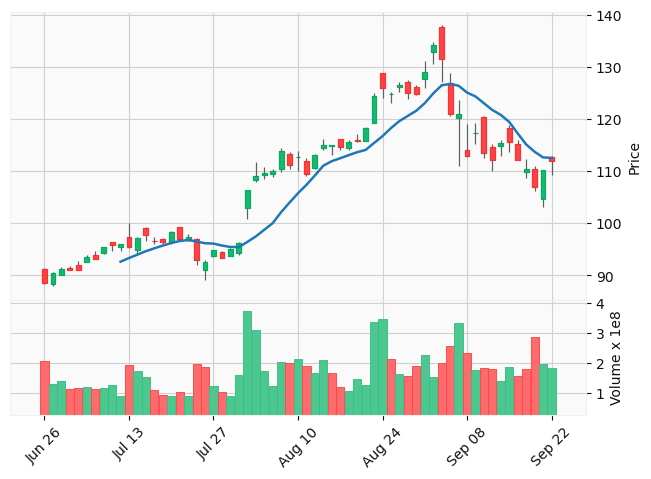

In [13]:
# YOUR CODE HERE
# raise NotImplementedError()
volume = pd.DataFrame(stock)
mpf.plot(volume.loc["2020-06-26":"2020-09-22"],style='yahoo',type='candle',mav=10,volume=True)

## Analyze Data: Identify Peaks and Troughs 

Peaks and troughs are patterns that are developed by the price action experienced by all securities. Identifying peaks and toughs is the cornerstone in stocking trend determination and technical analysis. As a general rule, higher peaks and higher troughs mean the market is going up, and will likely continue. Conversely, lower peaks and lower troughs mean the market is going down, and will likely continue.

Suppose we define a peak as an adjusted close price which is higher than both the `m` prior adjusted close prices and m succeeding adjusted close prices and a trough as the adjusted close price which is lower than itsm `m` prior and `m` succeeding adjusted close prices. Mathematically, we have the following definition:

$$peak(P_{t}) == True~iff~P_{t} >= P_{t+i}~\forall~i \in [-m, m]$$

$$trough(P_{t}) == True~iff~P_{t} <= P_{t+i}~\forall~i \in [-m, m]$$


Write some code find all the peaks and troughs of the Apple stock prices and plot those points on a stock chart figure like the one you created in Question 3. An example figure is shown as below:

![Example Figure](https://www.palmetto.clemson.edu/dsci/figures/ps02b_math_peaks.png)


### Question 5. Identify peaks and troughs (20 points)

1. __Implement the function get_troughs() to find all the troughs of the Apple stock's adjusted close price.__ (5 points)

To help you start, we have provided a naive implementation of the `get_peaks` function. 

In [14]:
def get_peaks(s, m=10):
    """get_peaks finds the peaks of a Time Series s"""
    p = s.values
    is_peak = np.full(len(p), False)
    for i in range(m, len(p)-m-1):
        ni = range(i-m, i+m+1)
        is_peak[i] = all(p[i] >= p[ni])
    return is_peak

# YOUR CODE HERE
# raise NotImplementedError()
def get_troughs(s, m=10):
    trough = s.values
    is_trough = np.full(len(trough), False)
    for i in range(m, len(trough)-m-1):
        ni = range(i-m, i+m+1)
        is_trough[i] = all(trough[i] <= trough[ni])
    return is_trough


df = stock.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df = df.assign(peak=get_peaks(df.adj_close, 10))
peaks = df[df.peak].adj_close

df = df.assign(trough=get_troughs(df.adj_close, 10))
troughs = df[df.trough].adj_close

In [15]:
troughs
import random as rnd
rnd.seed(10)
n = rnd.randint(0, len(troughs))
date, price = troughs.index[n], troughs.values[n]
print(date, price)
print(stock[stock.index > date].head(5)['Adj Close'].values)
assert all(stock[stock.index > date].head(5)['Adj Close'].values >= price)
print(stock[stock.index < date].tail(5)['Adj Close'].values)
assert all(stock[stock.index > date].head(5)['Adj Close'].values >= price)

2020-02-03 00:00:00 76.63629913330078
[79.16633606 79.81189728 80.74544525 79.64789581 80.02619171]
[76.70829773 78.87832642 80.5294342  80.41274261 76.84734344]


2. __Plot the peaks and troughs on a stock chart as the one shown above Question 5.__ (5 points)

In [16]:
# test to show indices of troughs
troughs.index

DatetimeIndex(['2017-04-19', '2017-06-16', '2017-07-06', '2017-07-31',
               '2017-09-25', '2017-12-06', '2017-12-29', '2018-02-08',
               '2018-03-23', '2018-04-27', '2018-06-25', '2018-07-30',
               '2018-09-21', '2018-10-11', '2019-01-03', '2019-06-03',
               '2019-08-05', '2019-12-03', '2020-02-03', '2020-03-23',
               '2020-07-24', '2020-09-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

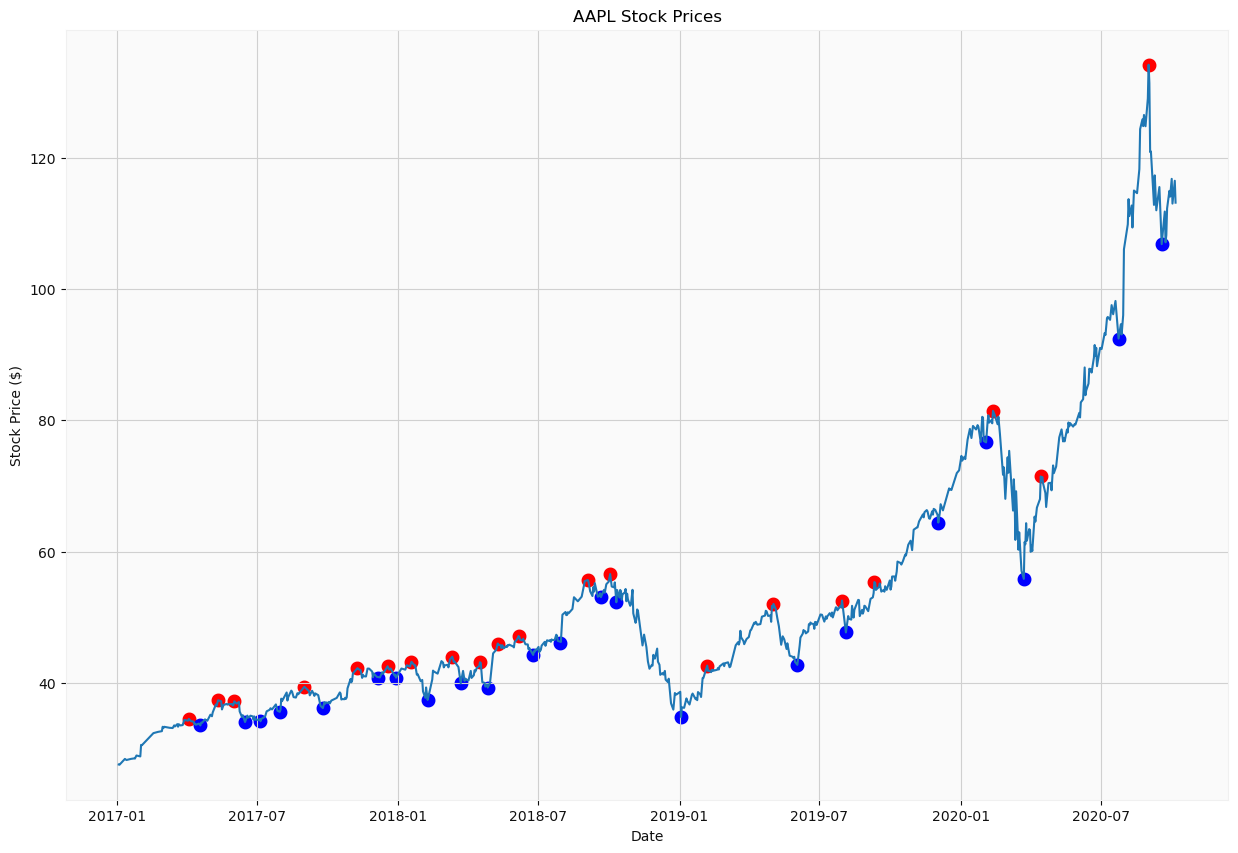

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False)
# YOUR CODE HERE
# raise NotImplementedError()
ax.plot(df.index, stock['Adj Close'])
ax.set_title("AAPL Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax.scatter(peaks.index, peaks,color='r', linewidths = 4)
ax.scatter(troughs.index,troughs,color='b',linewidths = 4)
# show grid on plot
plt.grid(True)
plt.show()

From the plot in Figure 5, you may notice that some of the peaks are local peaks and probably should not be counted as true peaks. For example, the peak price of 42.62 on 2019-02-06 for Apple stock is just a temporary pause of the stock price when it reached 52.02 on 2019-05-03. The same observation also goes to the troughs.

By changing the intervals of which a peak or trough is found, you may be able to remove some of the "false" peaks. But changing the intervals doesn't change the overall weakness of a simple peak identification algorithm.

One possible solution is that we introduce a set of rules for "true" peaks and troughs. For example, we may define a "true" peaks as a local peak defined in Question 5 but with the following filters:

A local peak $P_i$ is not a "true" peak if either of the following conditions meet:

   a. There is no trough between the next local peak $P_{i+j}$ and $P_{i} \lt P_{i+j}$ $\forall~j~\in [1, K-i]$ where $k$ is the total number of peaks.
   
   b. If there exists a trough $T_{k}$ between $P_{i}$ and $p_{j}$, and $P_{i} - T_{k} < \alpha P{i}$, then $T_{k}$ is not treated as a trough in a. Here $\alpha$ is a faction of price decrease, for example, $\alpha = 0.1$.   

We provide a `find_true_peaks()` function for finding the "true_peaks" and a code segment that finds the "true troughs".

In [18]:
def find_true_peaks(peaks, troughs, alpha=0.10):
    is_true_peaks = np.full(len(peaks), False)
    for i, peak_i in enumerate(peaks):
        is_true_peak = True
        # print(i, peaks.index[i], peak_i)
        for d_j, peak_j in peaks[i+1:].items():
            # print("\t", d_j, peak_j)
            has_trough = False
            for d, trough in troughs[troughs.index > peaks.index[i]].items():
                if d > d_j:
                    break
                # print("\t\t\t", d, trough, (peak_i - trough) / peak_i)
                if peak_i - trough > alpha * peak_i:
                    has_trough = True
                    # print("\t\t\t*", d, trough, (peak_i - trough) / peak_i)
                    break
            if not has_trough and peak_i < peak_j:
                is_true_peak = False
                break
        is_true_peaks[i] = is_true_peak
    return peaks[is_true_peaks]

In [19]:
is_true_troughs = np.full(len(troughs), False)
true_peaks = find_true_peaks(peaks, troughs, alpha=0.10)
true_troughs_dict = {}
for i, value in enumerate(true_peaks):
    dp_i, peak_i = true_peaks.index[i], value
    # find troughs between two peaks
    candidates = troughs[troughs.index > dp_i]
    if i < len(true_peaks) - 1:
        dp_j = true_peaks.index[i+1]
        candidates = candidates[candidates.index < dp_j]
    if len(candidates) > 0:
        i_min = candidates.argmin()
        true_troughs_dict[candidates.index[i_min]] = candidates[i_min]
true_troughs = pd.Series(true_troughs_dict)
true_troughs

2018-02-08     37.3902
2018-04-27     39.2776
2019-01-03     34.7814
2019-06-03     42.7370
2020-03-23     55.8404
2020-09-18    106.8400
dtype: float64

3. __Convert the above code segment into a function `find_true_troughs()`.__ (5 points)

In [20]:
# YOUR CODE HERE
# raise NotImplementedError()
def find_true_troughs(peaks, troughs, alpha=0.10):
    is_true_troughs = np.full(len(troughs), False)
    true_peaks = peaks
    true_troughs_dict = {}
    for i, value in enumerate(true_peaks):
        dp_i, peak_i = true_peaks.index[i], value
        # find troughs between two peaks
        candidates = troughs[troughs.index > dp_i]
        if i < len(true_peaks) - 1:
            dp_j = true_peaks.index[i+1]
            candidates = candidates[candidates.index < dp_j]
        if len(candidates) > 0:
            i_min = candidates.argmin()
            true_troughs_dict[candidates.index[i_min]] = candidates[i_min]
    true_troughs = pd.Series(true_troughs_dict)
    return true_troughs


In [21]:
# Use the two functions to find the true peaks and troughs
true_peaks = find_true_peaks(peaks, troughs)
true_troughs = find_true_troughs(true_peaks, troughs)
peaks_and_troughs = true_peaks.append(true_troughs).sort_index()
df_peaks_and_troughs = pd.DataFrame({'peaks_and_troughs': peaks_and_troughs})
df_peaks_and_troughs['pct_change'] = df_peaks_and_troughs['peaks_and_troughs'].pct_change()
df_peaks_and_troughs['date'] = df_peaks_and_troughs.index
df_peaks_and_troughs['time_span'] = df_peaks_and_troughs['date'] - df_peaks_and_troughs['date'].shift(1)
df_peaks_and_troughs.drop(['date'], axis=1, inplace=True)
df_peaks_and_troughs

,peaks_and_troughs,pct_change,time_span
2018-01-18,43.2005,NaN,NaT
2018-02-08,37.3902,-0.1345,21 days
2018-03-12,43.9719,0.1760,32 days
2018-04-27,39.2776,-0.1068,46 days
2018-10-03,56.5697,0.4403,159 days
2019-01-03,34.7814,-0.3852,92 days
2019-05-03,52.0187,0.4956,120 days
2019-06-03,42.7370,-0.1784,31 days
2020-02-12,81.4324,0.9054,254 days
2020-03-23,55.8404,-0.3143,40 days


In [22]:
true_peaks = find_true_peaks(peaks, troughs)
true_troughs = find_true_troughs(true_peaks, troughs)
peaks_and_troughs = true_peaks.append(true_troughs).sort_index()
assert (len(peaks_and_troughs) > 2)
if len(peaks_and_troughs) > 2:
    if peaks_and_troughs[0] > peaks_and_troughs[1]:
        assert(all([peaks_and_troughs[i] > peaks_and_troughs[i+1] for i in range(0, len(peaks_and_troughs)-2, 2)]))
    else:        
        assert(all([peaks_and_troughs[i] < peaks_and_troughs[i+1] for i in range(0, len(peaks_and_troughs)-2, 2)]))

4. __Plot the trendlines that connect true peaks and troughs on the stock price chart. Your figure may look like the one shown below.__ (5 points)

![Example Figure](https://www.palmetto.clemson.edu/dsci/figures/ps02b_true_peaks.png)

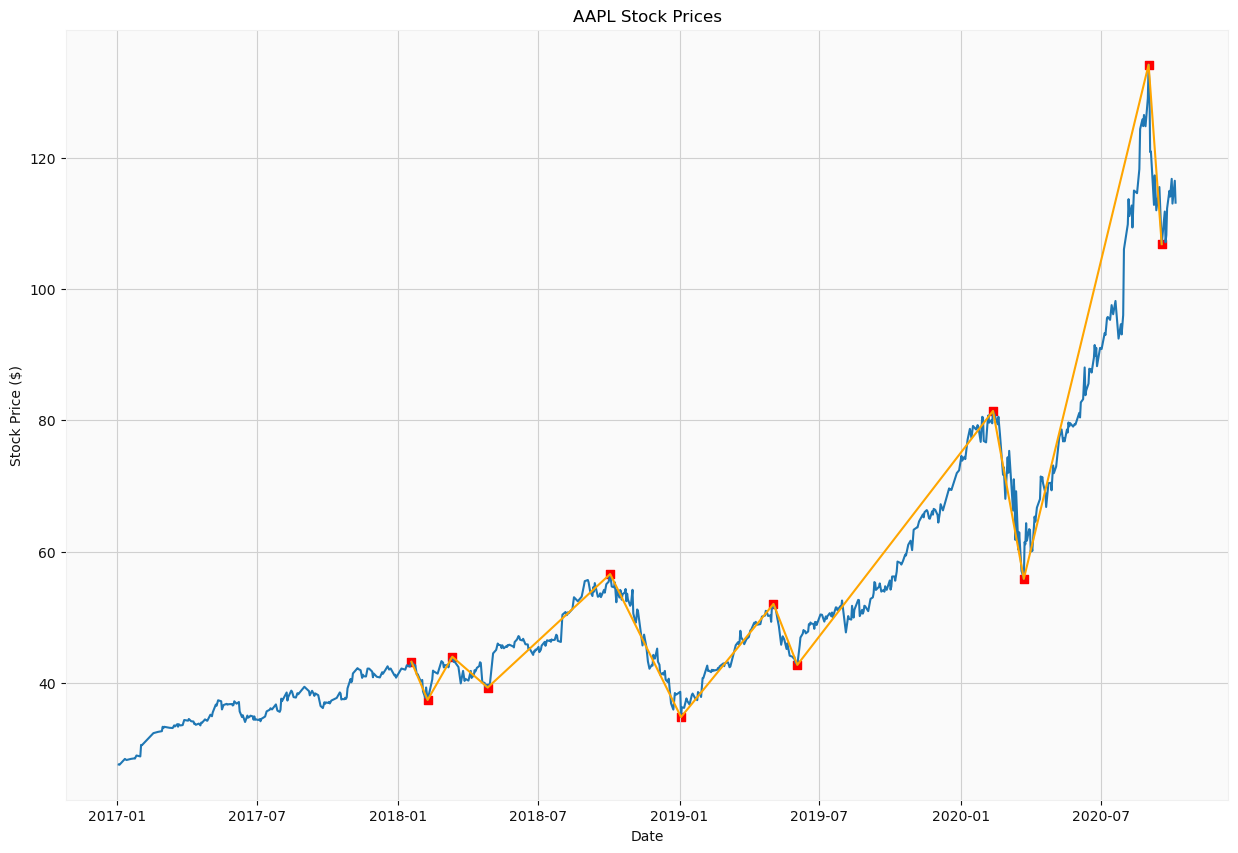

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False)
# YOUR CODE HERE
# raise NotImplementedError()
ax.plot(df.index, stock['Adj Close'])
ax.set_title("AAPL Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax.plot(peaks_and_troughs.index, peaks_and_troughs,color='orange')
ax.scatter(peaks_and_troughs.index, peaks_and_troughs,color='r',marker='s')
plt.show()

## Question 6. Identify Outliers

When working with a dataset, you may often encounter observations that are significantly different from the majority. We can these observations outliers or anomalies. Many machine learning algorithms and statistical approaches can be influenced by outliers, leading to incorrect/biased results. Therefore, you should handle the outliers before feeding the data into a model.

For stock prices, you can identify outliers using the 3-$\sigma$ approach. In short, an observation is an outlier if its daily simple return is greater than three times the standard variance of the simple returns of $n$-day moving average. One choice of $n$ is 21.

1. __Read the code and complete the function `is_outlier()`__. (5 points)

In [24]:
def is_outlier(row, n_sigma=3):
    """is_outlier checks if the difference between row's simple_return and row's rolliwng mean is outside the 3-sigma range."""
    if row['mean'] == np.NaN or row['std'] == np.NaN:
        return np.NaN
    if abs(row['simple_return'] - row['mean']) > n_sigma * row['std']:
            return True
    return False
# YOUR CODE HERE
# raise NotImplementedError()

df = stock.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df['simple_return'] = df.adj_close.pct_change()

df_rolling = df[['simple_return']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()
df_outliers = df.join(df_rolling)

df_outliers['is_outliers'] = df_outliers.apply(is_outlier, axis=1)
outliers = df_outliers[df_outliers['is_outliers']]
outliers

,adj_close,simple_return,mean,std,is_outliers
Date,,,,,
2017-08-02,37.5865,0.0473,0.0044,0.0125,True
2018-02-02,38.6795,-0.0434,-0.0033,0.0130,True
2018-08-01,48.9462,0.0589,0.0036,0.0158,True
2019-03-11,43.9487,0.0346,0.0024,0.0097,True
2019-05-01,51.7165,0.0491,0.0047,0.0136,True
2020-07-31,106.0688,0.1047,0.0078,0.0279,True


You can visualize the outlier in a stock chart using the following code segment.

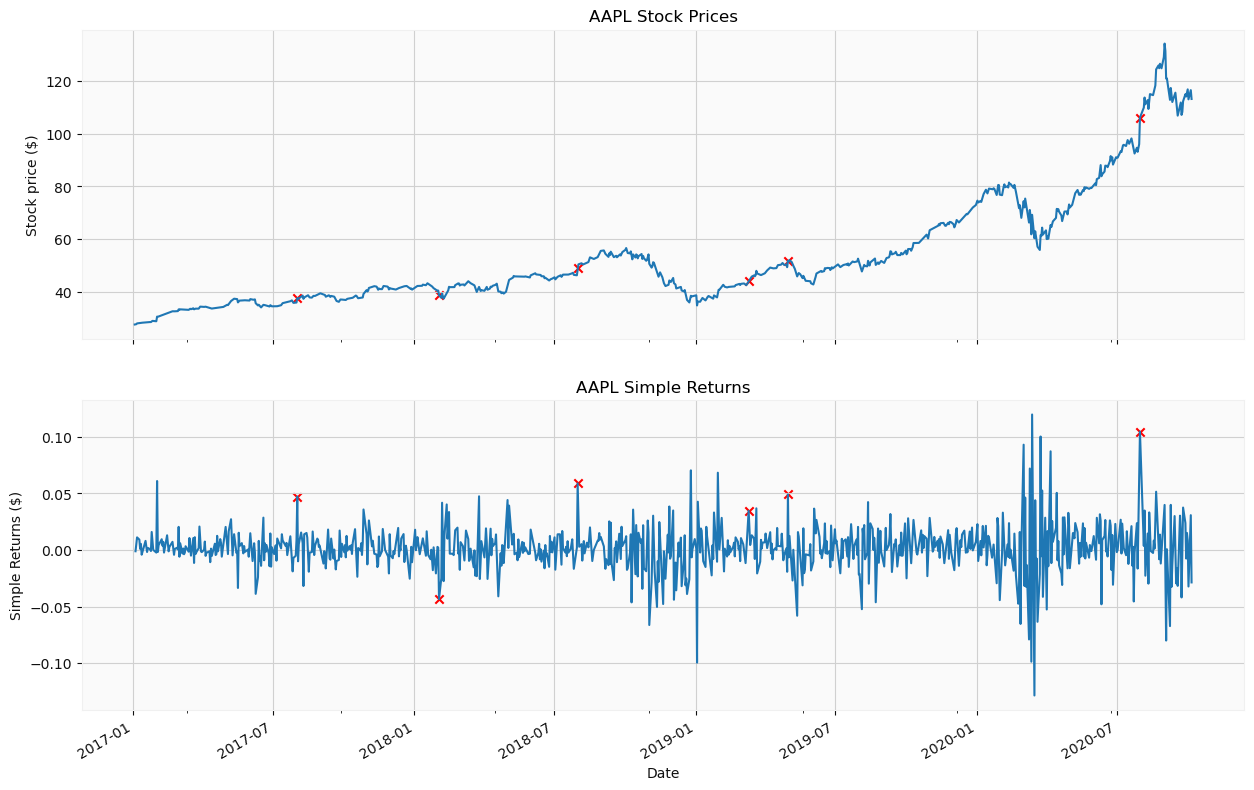

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
df.adj_close.plot(ax=ax[0])
df.simple_return.plot(ax=ax[1])
ax[0].set(title = 'AAPL Stock Prices', xlabel = 'Date', ylabel = 'Stock price ($)')
ax[0].scatter(outliers.index, outliers['adj_close'], marker='x', color='r')
ax[1].set(title = 'AAPL Simple Returns', xlabel = 'Date', ylabel = 'Simple Returns ($)')
_ =  ax[1].scatter(outliers.index, outliers['simple_return'], marker='x', color='r')

## Question 7. Technical Analysis (10 points)

Technical analysis seeks to predict price movements by examining historical data, mainly price and volume. There are many techniques in technical analysis.

In Question 4, you have created a candlestick chart, which describes the movements of a security's the open, high, low, and close prices (OHLC) for any given trading interval (seconds, minutes, hours, days, weeks, or months).

Technical analysis often uses indicator or patterns to capture signals for trading decision. One commonly used type of indicators is simple moving average, which calculates the average of a selected range of prices by the number of periods in that range.

1. __Complete the following code so that the code will plot the 20-, 50-, and 200-day moving average along with adjusted close price.__ (5 points)

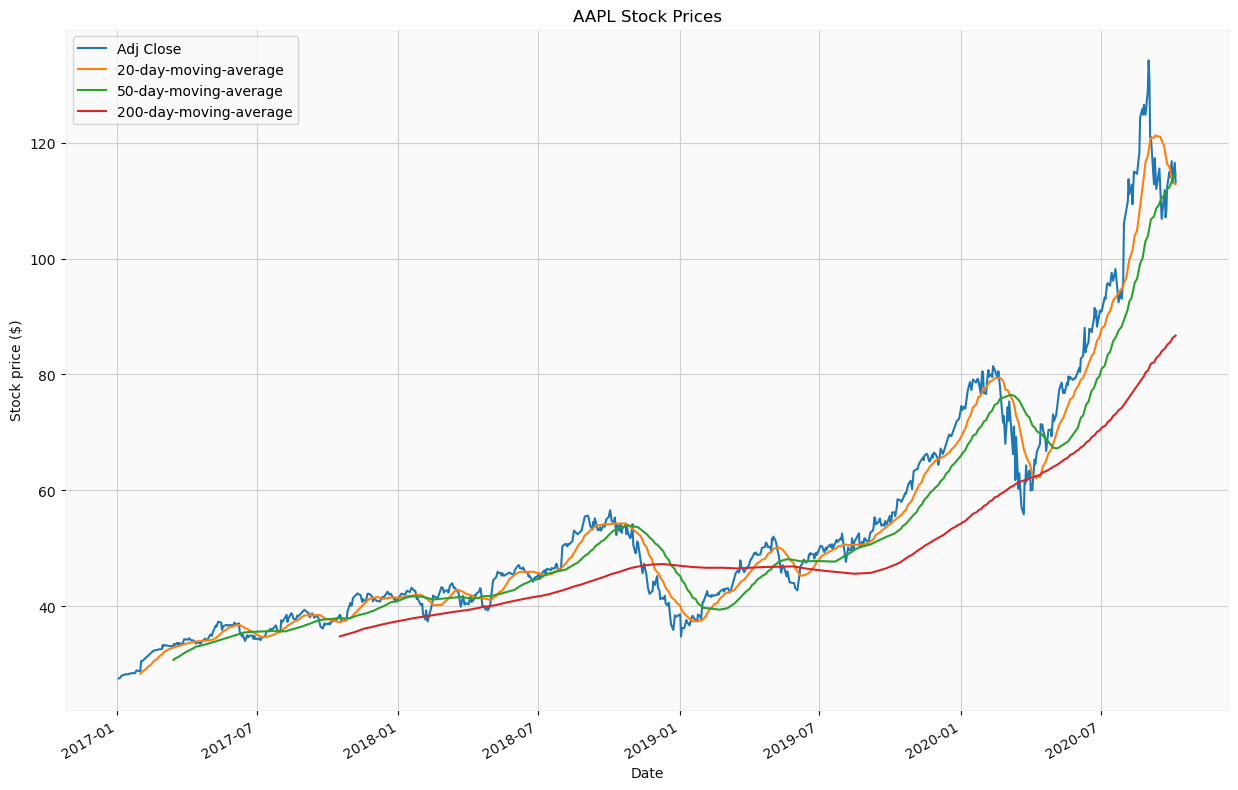

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False)
df = pd.DataFrame(stock[['Adj Close']])
# YOUR CODE HERE
# raise NotImplementedError()
df['20-day-moving-average'] = df[['Adj Close']].rolling(window=20).agg(['mean'])
df['50-day-moving-average'] = df[['Adj Close']].rolling(window=50).agg(['mean'])
df['200-day-moving-average'] = df[['Adj Close']].rolling(window=200).agg(['mean'])

df.plot(ax=ax)
ax.set(title = 'AAPL Stock Prices', xlabel = 'Date', ylabel = 'Stock price ($)')
plt.show()

2. __Based on the chart you have plot in Question 7-1, describe any pattern that may indicate the trend of price movement has reversed (i.e., from price going upward to downward, and vice versa).__ (5 points)

### Type your answer here.

### Answers
1. **In the curve of 20 day moving average**, there are three obvious patterns, indicating the reversed trend of price movement, 
in periods from 2018-07 to 2019-07,  from 2019-01 to 2019-07
and from 2020-01 to 2020-07. Moreover, the trend in period from 2017-01 to 2018-07 is swaying, but this doesn't
indicate the trend of price movement reverses since the curve is still moving upward.


2. **According to the 50 day moving average curve**,in the period between 2018-07 and 2019-01, and the period between 2020-01 and 2020-07, 
the trend of price movement first goes upward then moves downward obviously. After the short-term downward movement, the trend moves upward again.  Both two durations have 2 patterns indicating that price movement has reversed.
In addition, in the period between 2019-01 and 2019-07, the trend moves upward and then downward slightly. This is one pattern of 
reversing price movement. Then it moves upward again after 2019-07, which is the second pattern of reversing movement. However, these two patterns are less obvious than the patterns in period from 2018-07 to 2019-01 and period from  2020-01 to 2020-07


3. **In the curve of 200 day moving average**, the patterns indicating the trend of price movement has reversed are not obvious,it just captures
the global trend  from 2018 to 2020.


## Add User Interface

After you have developed some impressive functionalities for handing stock data, you want to explore more stocks without changing the code. You also would like to ask you friends to try your first data science "product" who doesn't know much about Python gramming.

With Jupyter Widget, you can add a User Interface for your code. Below is a simple example illustrating how to add UI in a Jupyter notebook.

In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
def f(x):
    print("I like", x)
    
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

## Question 8. 

1. __Create a simple UI so that a user can select a stock symbol from a list of predefined stocks to plot a chart like the one you have created in Question 7 for the Apple stock.__ (15 points)

For simplicity, you can fix the date range and only allow the user to select the stock symbol from a list of symbols in which you are interested. If you are not familiar with stocks, you can set the list to be ['AAPL','TSLA', 'NVDA', 'AMD', 'WMT', 'QQQQ', 'GOOG', 'FB', 'AMZN'].

In [29]:
# YOUR CODE HERE
# raise NotImplementedError()
def plot_stock_chart(stock,start_date, end_date):
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    import pandas as pd
    import numpy as np
    import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns
    import mplfinance as mpf
    %matplotlib inline
    pd.set_option('precision', 4)
    import yfinance as yf    
    stock = yf.download(stock, start=start_date, end=end_date)
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=False)
    df = pd.DataFrame(stock[['Adj Close']])
    
    df['20-day-moving-average'] = df[['Adj Close']].rolling(window=20).agg(['mean'])
    df['50-day-moving-average'] = df[['Adj Close']].rolling(window=50).agg(['mean'])
    df['200-day-moving-average'] = df[['Adj Close']].rolling(window=200).agg(['mean'])

    df.plot(ax=ax)
    ax.set(title = 'AAPL Stock Prices', xlabel = 'Date', ylabel = 'Stock price ($)')
    plt.show()

# initialize date list
# default start date is from 2017-01-01
start_date_ls = ['2017-01-01']
end_date_ls = [str(datetime.date(y,month,1)) for y in range(2017,int(datetime.date.today().year)+1 ,1)
               for month in [i for i in range(1,datetime.date.today().month) ] if not (y==2017 and month==1) ]
# include today data
end_date_ls.append(datetime.date.today())
end_date_ls.reverse()
# interaction
interact(plot_stock_chart, stock = ['AAPL','TSLA', 'NVDA', 'AMD', 'WMT', 'QQQQ', 'GOOG', 'FB', 'AMZN'],
         start_date = start_date_ls,
        end_date =end_date_ls )


interactive(children=(Dropdown(description='stock', options=('AAPL', 'TSLA', 'NVDA', 'AMD', 'WMT', 'QQQQ', 'GO…

<function __main__.plot_stock_chart(stock, start_date, end_date)>

2. __Based on what you have learned in the assignment, which direction (UP, DOWN, FLAT, UNCLEAR) do you think the stock is likely to move in next 5 days?  You should provide a simple justification.__ (5 points)

You answer will depend on the day you work on this question. Your justification will count 3 points.

### Type your answer here.

# Answer
**The date I tested with this program is 2020-10-7 and the stock I analyze is AAPL stock**. At this date, I think the trend of stock price in the next 5 days will continue moving upward slowly in short term or even becomes flat,base on the observation that the trend of price movement in AAPL stock is ascending from 2020-07 to 2020-09 and then goes downward in short term, finally goes upward again to current date. .

The reason is that based on the patterns from 2019-07 to 2020-01 and from 2018-07 to 2019-01, the reversed pattern of the trend of price movement may be that the price movement first ascends dramatically to reach a peak and then moves downward to reach a trough. Finally, it moves upward again.

The pattern of price movement from 2020-07-01 to 2020-10-07 (today) actually satisfies these conditions of a reversed pattern, as it reaches a peak and a trough during this period and the trend of price movement moves upward again slowly recently. Hence, I think the stock may continue moving up slowly in short term or even become flat.


__Congratulations! You have just completed Part B of PS02.__